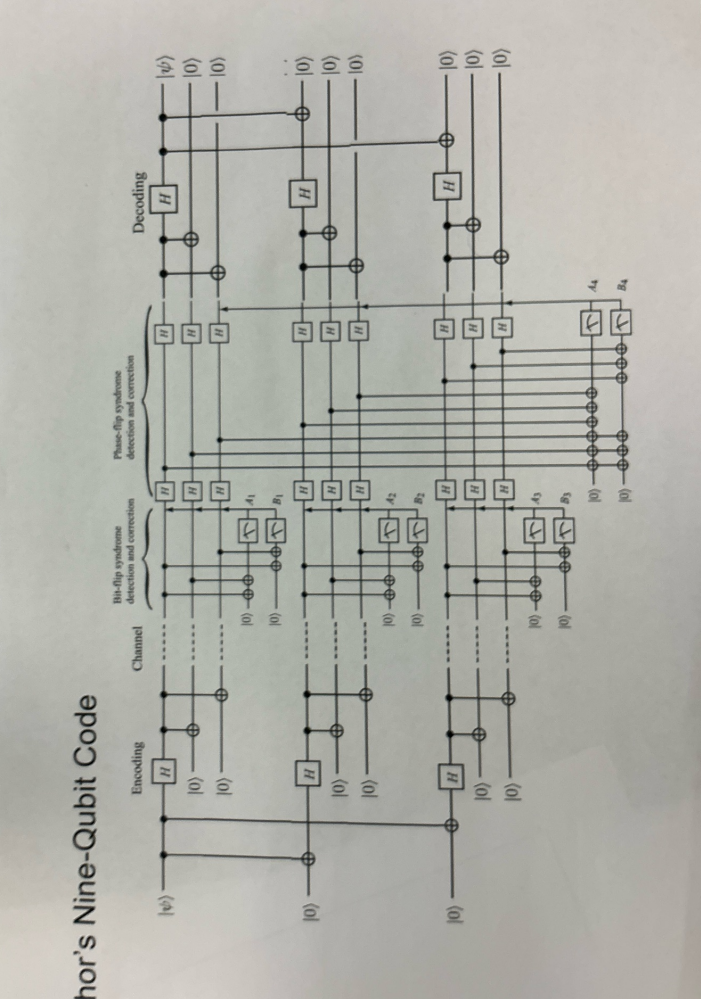

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector 
from qiskit.circuit.library import MCXGate 

initial state:


<IPython.core.display.Latex object>

Prepared state:


<IPython.core.display.Latex object>

After encoding:


<IPython.core.display.Latex object>

After Phase-Bit flip error:


<IPython.core.display.Latex object>

After Bitflip syndrome detection and correction:


<IPython.core.display.Latex object>

Phaseflip syndrome detection and correction:


<IPython.core.display.Latex object>

After decoding:


<IPython.core.display.Latex object>

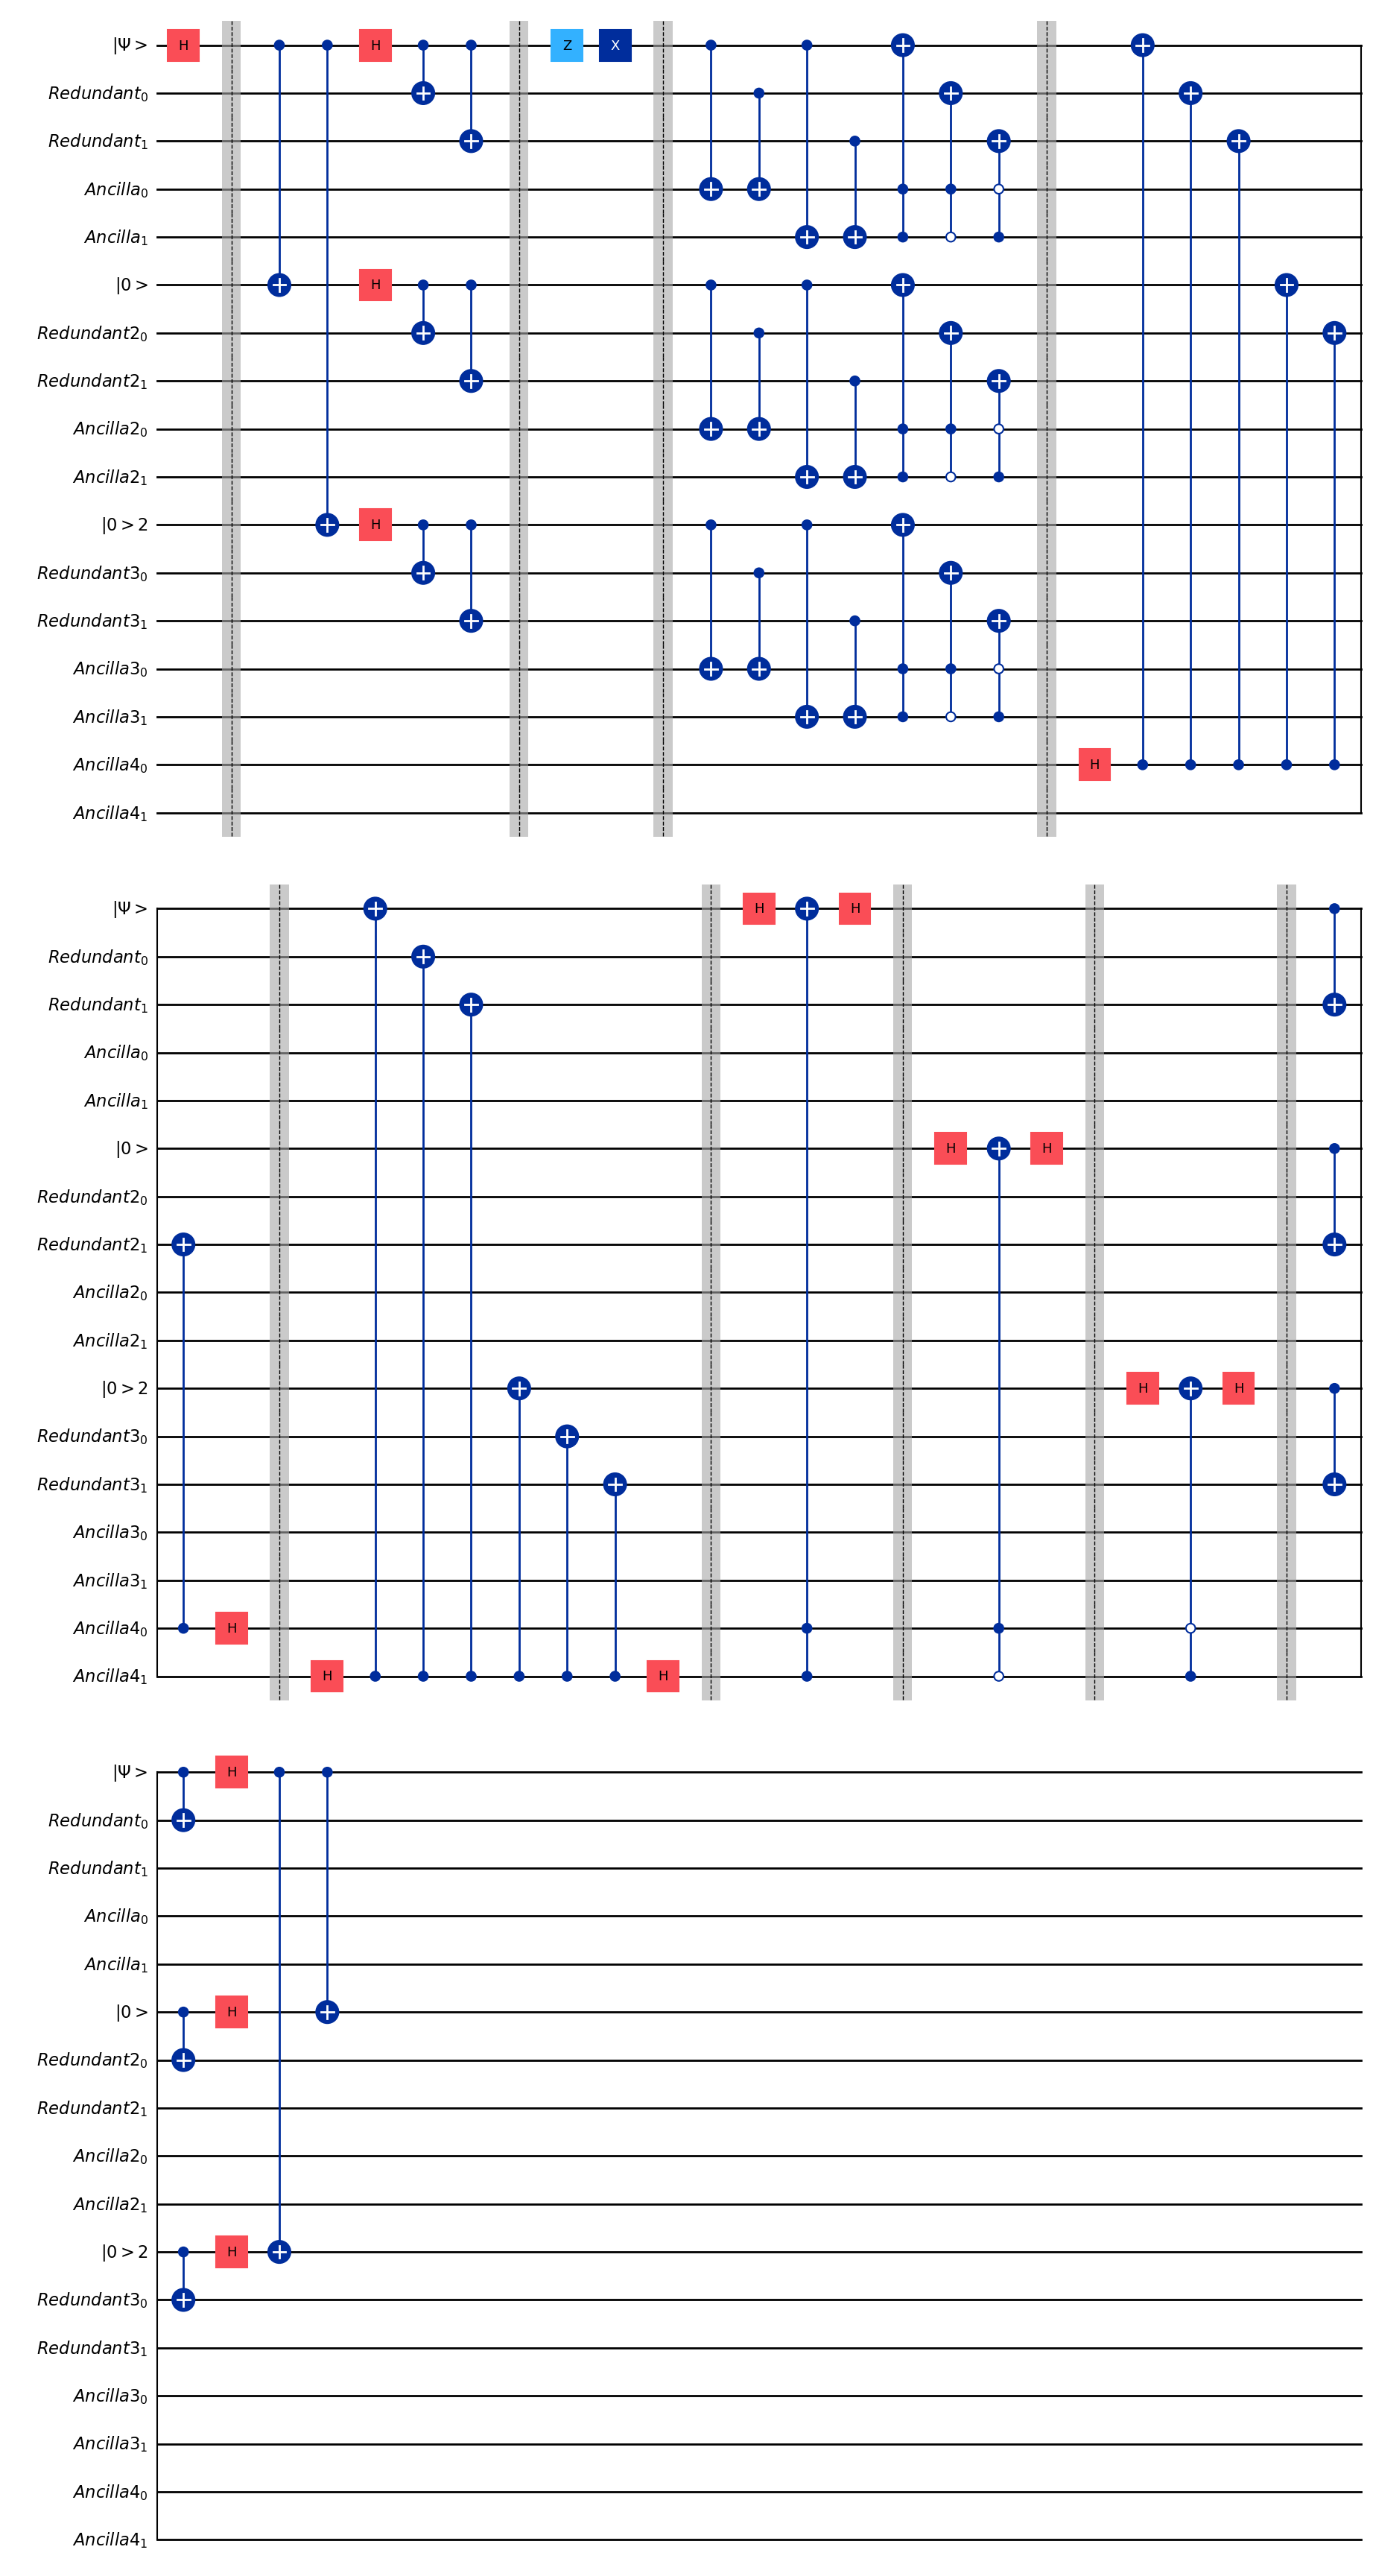

In [2]:
from qiskit import QuantumCircuit, QuantumRegister

psi = QuantumRegister(1, '|Ψ>')
zero = QuantumRegister(1, '|0>')
redundant = QuantumRegister(2, 'Redundant')
ancicall = QuantumRegister(2, 'Ancilla')

# Create new registers for duplicated ones with unique names
redundant2 = QuantumRegister(2, 'Redundant2')
ancicall2 = QuantumRegister(2, 'Ancilla2')
zero2 = QuantumRegister(1, '|0>2')
redundant3 = QuantumRegister(2, 'Redundant3')
ancicall3 = QuantumRegister(2, 'Ancilla3')
ancicall4 = QuantumRegister(2, 'Ancilla4')

Qc = QuantumCircuit(psi, redundant, ancicall, zero,
					redundant2, ancicall2, zero2,
					redundant3, ancicall3, ancicall4)

psi = Statevector(Qc)
print("initial state:")
display(psi.draw('Latex'))

#state preparation
Qc.h(0)
psi = Statevector(Qc)
print("Prepared state:")
display(psi.draw('Latex'))

Qc.barrier()

#encoding
Qc.cx(0,5)
Qc.cx(0,10)

Qc.h([0,5,10])

Qc.cx(0,1)
Qc.cx(0,2)

Qc.cx(5,6)
Qc.cx(5,7)

Qc.cx(10,11)
Qc.cx(10,12)


psi = Statevector(Qc)
print("After encoding:")
display(psi.draw('Latex'))

Qc.barrier()

#PhaseBit flip error happens on qubit 0
Qc.z(0)
Qc.x(0)

psi = Statevector(Qc)
print("After Phase-Bit flip error:")
display(psi.draw('Latex'))

Qc.barrier()
#Bitflip syndrome detection and correction

Qc.cx(0,3)
Qc.cx(1,3)
Qc.cx(0,4)
Qc.cx(2,4)

Qc.cx(5,8)
Qc.cx(6,8)
Qc.cx(5,9)
Qc.cx(7,9)


Qc.cx(10,13)
Qc.cx(11,13)
Qc.cx(10,14)
Qc.cx(12,14)

#correction
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='11'), [3, 4, 0])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='01'), [3, 4, 1])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='10'), [3, 4, 2])


Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='11'), [8, 9, 5])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='01'), [8, 9, 6])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='10'), [8, 9, 7])


Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='11'), [13, 14, 10])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='01'), [13, 14, 11])
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='10'), [13, 14, 12])


psi = Statevector(Qc)
print("After Bitflip syndrome detection and correction:")
display(psi.draw('Latex'))

Qc.barrier()

#Phaseflip syndrome detection and correction

Qc.h(15)
Qc.mcx([15],[0,1,2,5,6,7])
Qc.h(15)

Qc.barrier()

Qc.h(16)
Qc.mcx([16],[0,1,2,10,11,12])
Qc.h(16)

Qc.barrier()


#correction
Qc.h(0)
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='11'), [15, 16, 0])
Qc.h(0)


Qc.barrier()

Qc.h(5)
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='01'), [15, 16, 5])
Qc.h(5)


Qc.barrier()

Qc.h(10)
Qc.append(MCXGate(num_ctrl_qubits = 2 , ctrl_state='10'), [15, 16, 10])
Qc.h(10)


psi = Statevector(Qc)
print("Phaseflip syndrome detection and correction:")
display(psi.draw('Latex'))

Qc.barrier()
#decoding
Qc.cx(0,2)
Qc.cx(0,1)
Qc.h(0)

Qc.cx(5,7)
Qc.cx(5,6)
Qc.h(5)

Qc.cx(10,12)
Qc.cx(10,11)
Qc.h(10)

Qc.cx(0,10)
Qc.cx(0,5)

psi = Statevector(Qc)
print("After decoding:")
display(psi.draw('Latex'))

Qc.draw('mpl')